In [122]:
%matplotlib notebook

import tensorflow as tf
# import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # 读取文件
from sklearn.utils import shuffle # 打乱数据
from sklearn.preprocessing import scale # 打乱数据

df = pd.read_csv("data/boston.csv", header=0)

print(df.describe())

# pip install scikit-learn 不存在就先下载

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [123]:
print(df.head(3))
print(df.tail(3))

      CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
        CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
503  0.06076   0.0   11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0   11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0   11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
503     21.0   5.64  23.9  
504     21.0   6.48  22.0  
505     21.0   7.88  11.9  


In [124]:

# df = np.array(df)
# print(df.type())
ds=df.values
# print(df.type())
print(ds.shape)
print(ds)

(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


In [125]:
cols = ds.shape[1]-1
rows = ds.shape[0]
x_data = ds[:,:cols] # 12列不包含
y_data = ds[:,cols]
# for i in range(cols):
#     x_data[:,i] = (x_data[:,i]-x_data[:,i].min())/(x_data[:,i].max()-x_data[:,i].min())
    
print(x_data.shape)
print(y_data.shape)

(506, 12)
(506,)


In [126]:
train_num = 300
vaild_num = 100
test_num = len(x_data) - train_num-vaild_num
x_train = x_data[:train_num]
y_train = y_data[:train_num]

x_valid = x_data[train_num:train_num+vaild_num]
y_valid = y_data[train_num:train_num+vaild_num]

x_test = x_data[train_num+vaild_num:len(x_data)]
y_test = y_data[train_num+vaild_num:len(x_data)]

print(x_train.shape,x_valid.shape,x_test.shape)

(300, 12) (100, 12) (106, 12)


In [127]:
# x_train = tf.cast(x_train,dtype=tf.float32)
# x_valid = tf.cast(x_valid,dtype=tf.float32)
# x_test= tf.cast(x_test,dtype=tf.float32)

x_train = tf.cast(scale(x_train),dtype=tf.float32)
x_valid = tf.cast(scale(x_valid),dtype=tf.float32)
x_test= tf.cast(scale(x_test),dtype=tf.float32)

In [128]:
def model(x,w,b):
    return tf.matmul(x,w) + b

In [129]:
W = tf.Variable(tf.random.normal([12,1],mean=0.0,stddev=1.0,dtype=tf.float32))
B = tf.Variable(tf.zeros(1),dtype = tf.float32)

# 通过下面的注释调解训练超参数

In [130]:
#1 原始数据
training_epochs = 50
learning_rate = 0.001
batch_size = 10
# #2 增加batch
# training_epochs = 500
# learning_rate = 0.001
# batch_size = 100
#3 增加batch为整个集合
# training_epochs = 500
# learning_rate = 0.001
# batch_size = 10
# #4 减少rate
# training_epochs = 50
# learning_rate = 0.01
# batch_size = 10
# #5 再次减少rate
# training_epochs = 50
# learning_rate = 0.1
# batch_size = 10



In [131]:
# 损失函数模型
def loss(x,y,w,b):
    err = model (x,w,b) -y
    squared_err = tf.square(err)
    return tf.reduce_mean(squared_err)# 梯度
def grad(x,y,w,b):
    # tf.GradientTape() tf2 1 区别 梯度带
    with tf.GradientTape() as tape:
        loss_ =loss(x,y,w,b) # 不需要优化器
    return tape.gradient(loss_,[w,b])


In [132]:

optimizer = tf.keras.optimizers.SGD(learning_rate)
loss_list_train = []
loss_list_valid = []
total_step = int(train_num/batch_size)
for epoch in range(training_epochs):
    for step in range(total_step):
        xs = x_train[step*batch_size:(step+1)*batch_size,:]
        ys = y_train[step*batch_size:(step+1)*batch_size]
        
        grads = grad(xs,ys,W,B) #计算梯度
        optimizer.apply_gradients(zip(grads,[W,B])) # 优化器根据WB 自动调整
        
    loss_train = loss(x_train,y_train,W,B).numpy() # 计算训练损失
    loss_valid = loss(x_valid,y_valid,W,B).numpy()# 验证损失
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    print("epoch={:3d}, train_loss={:.4f},valid_loss={:.4f}".format(epoch+1,loss_train,loss_valid))
    

epoch=  1, train_loss=665.9260,valid_loss=463.5371
epoch=  2, train_loss=598.2957,valid_loss=413.4243
epoch=  3, train_loss=540.4822,valid_loss=371.3438
epoch=  4, train_loss=490.2661,valid_loss=335.2163
epoch=  5, train_loss=446.2108,valid_loss=303.8052
epoch=  6, train_loss=407.3285,valid_loss=276.3255
epoch=  7, train_loss=372.8951,valid_loss=252.2357
epoch=  8, train_loss=342.3467,valid_loss=231.1268
epoch=  9, train_loss=315.2221,valid_loss=212.6662
epoch= 10, train_loss=291.1310,valid_loss=196.5673
epoch= 11, train_loss=269.7347,valid_loss=182.5759
epoch= 12, train_loss=250.7355,valid_loss=170.4623
epoch= 13, train_loss=233.8693,valid_loss=160.0181
epoch= 14, train_loss=218.9007,valid_loss=151.0534
epoch= 15, train_loss=205.6199,valid_loss=143.3968
epoch= 16, train_loss=193.8396,valid_loss=136.8928
epoch= 17, train_loss=183.3924,valid_loss=131.4018
epoch= 18, train_loss=174.1293,valid_loss=126.7985
epoch= 19, train_loss=165.9174,valid_loss=122.9710
epoch= 20, train_loss=158.6384,

<IPython.core.display.Javascript object>


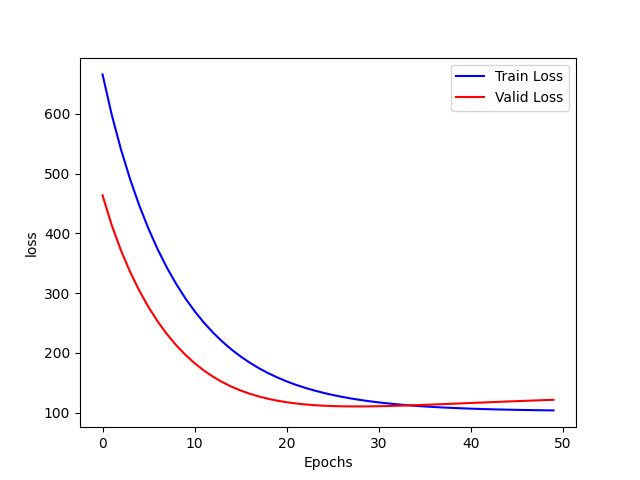

In [133]:
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.plot(loss_list_train,'blue',label="Train Loss")
plt.plot(loss_list_valid,'red',label="Valid Loss")
plt.legend(loc=1)

In [134]:
print("Test loss: {:.4f}".format(loss(x_test,y_test,W,B).numpy()))

Test loss: 114.3441


In [135]:
test_house_id = np.random.randint(0,test_num)
y = y_test[test_house_id]
y_pred = model(x_test,W,B)[test_house_id]
y_predit = tf.reshape(y_pred,()).numpy()
print(y, y_predit)

13.8 22.196583


In [136]:
print(W)
print(B)

<tf.Variable 'Variable:0' shape=(12, 1) dtype=float32, numpy=
array([[ 0.10579794],
       [ 0.20542106],
       [-1.4586316 ],
       [ 0.8057945 ],
       [-0.86811095],
       [ 1.7006317 ],
       [-0.00365536],
       [-0.6804875 ],
       [ 0.19135407],
       [-0.34400553],
       [-2.2758434 ],
       [-0.7303685 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([24.266283], dtype=float32)>
